# Part 1 - Last Day

ဒီနေ့ဟာ Data Science Using Python - Part 1 ရဲ့ နောက်ဆုံးနေ့ week 12 - day 2 ဖြစ်ပါတယ်။ 

## Review

သိပြီးသမျှကို Review အနေနဲ့ ပြန်ပြောရရင် [Recipe အခု 20 ကို ဒီမှာ ရယူနိုင်ပါတယ်။](https://drive.google.com/file/d/19PU3XrrIDCMKy4eFaZJTZpEA9rCmQGuj/view?usp=sharing)

သင်တန်းသားတွေ အနေနဲ့ အောက်ပါတို့ကို (Google ရှာပြီးဖြစ်ဖြစ် stack overflow မှာ ရှာပြီးဖြစ်ဖြစ် copy/paste လုပ်တာပဲဖြစ်ဖြစ်) လုပ်တတ်သင့်ပါပြီ။ 

ကိုယ့်ဟာကိုယ် မညာတမ်း ပြန်ဖြေကြည့်ပါ။ မရသေးရင် စမ်းပါ။

1. Data တွေကို manipulate လုပ်တာ၊ slice/dice/selection etc. 
2. Linear equations/non-linear equations တွေကို ရှင်းတာ၊ minimise လုပ်တာ

Assignment 1 (week 8) က ဒီ ၂ ခုကို check တာဖြစ်တယ်။

3. သင်္ချာ function တခုကို python နဲ့ရေးတာ။ python code အစိမ်းတွေ့ရင် ဖတ်တတ်တာ။ 
4. Regression/classification/clustering တွေ ဘယ်လိုကွဲသလဲ ရှင်းပြနိုင်တာ။

5. Linear regression/logistic regression/kmeans clustering model တွေဆောက်တာ၊ အဲဒီ model တွေရဲ့ performance ကိုတိုင်းတာ။ အဲဒီ‌ model တွေရဲ့ အရေးကြီးတဲ့ hyperparameter တွေကိုပြောင်းတာ၊ ပြန် train တာ။

Assignment 2 (week 10) က ဒါကို တပိုင်းတစ စစ်ဆေးတာ ဖြစ်တယ်။

Part 1 ရဲ့အဆုံး project က ဒီ ၅ ပိုင်းလုံး ကျွမ်းကျင်မှ လုပ်နိုင်လိမ့်မယ်။ 

## distance-based methods

### What is the distance between two points ?

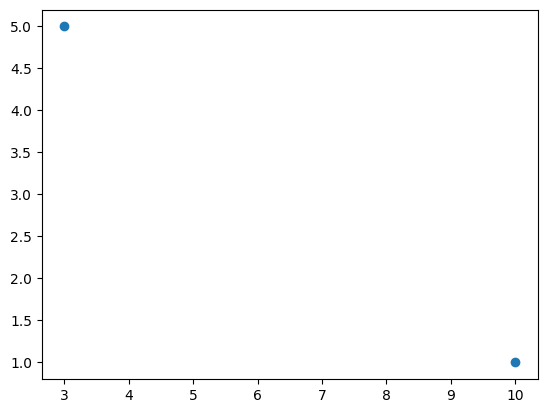

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

import numpy as np 

from sklearn import datasets
from sklearn import neighbors
from sklearn import cluster
from sklearn import model_selection
from sklearn import metrics

X1 = 0
X2 = 1
data = np.array([
    [3.0, 5.0],
    [10.0, 1.0]
])
plt.scatter(data[:,X1], data[:,X2])
plt.show()

Distance between two vectors (points) $V_1 = \langle v_{1,1}, v_{1,2} \rangle$ and $V_2 = \langle v_{2,1}, v_{2,2} \rangle$ is given by: 

$$d(V_1, V_2) = \sqrt{(v_{2,1} - v_{1,1})^2 + (v_{2,2} - v_{1,2})^2}$$

This is known as **Euclidean Distance**. 

> $L_2$-norm is defined as the distance of a vector from origin $O$.

> There are other distances known as **Manhattan Distance** and **Cosine Distance**. 

### Generalization of **Euclidean Distance**

Generalization of Euclidean Distance is given as : 

$$d(V_1, V_2) = \sqrt{(v_{2,1} - v_{1,1})^2 + (v_{2,2} - v_{1,2})^2 + ... + (v_{2,m} - v_{1,m})^2}$$

$$=\sqrt{\sum_{k=1}^{m}{(v_{2,k} - v_{1,k})^2}}$$

ဟိုတပါတ်က ဆွေးနွေးခဲ့တဲ့ `KMeans` က Euclidean Distance ကို သုံးတယ်။

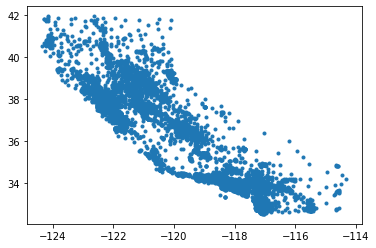

In [ ]:
df_X, ds_y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
plt.scatter(df_X.Longitude, df_X.Latitude, marker=".")
plt.show()

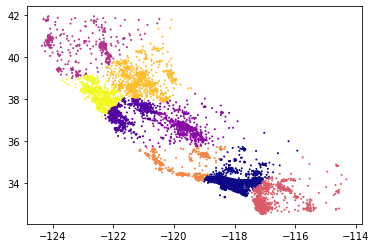

In [ ]:
model = cluster.KMeans()
model.fit(df_X[["Longitude", "Latitude"]])
results = model.predict(df_X[["Longitude", "Latitude"]])
plt.scatter(df_X["Longitude"], df_X["Latitude"], s=1, c=results, cmap="plasma")
plt.show()

### `KNeighborsClassifier` and `KNeighborsRegressor`

နောက်ထပ် ဆွေးနွေးမဲ့ distance-based method နောက်တခုကတော့ `KNeighborsClassifier` နဲ့ `KNeighborsRegressor` ပဲ ဖြစ်တယ်။ 

In [2]:
tr_X, ts_X, tr_y, ts_y = model_selection.train_test_split(df_X, ds_y)

model = neighbors.KNeighborsRegressor()

model.fit(tr_X, tr_y)
y_pred = model.predict(ts_X)
print (metrics.r2_score(y_true=ts_y, y_pred=y_pred))

NameError: name 'df_X' is not defined

အရေးပါတဲ့ model parameter တွေက ... 

* `n_neighbors`
* `weight` : either "uniform" or "distance"
* `metric` : "minkowski" သို့မဟုတ် function တခု
* `p` : 1 ဆိုရင် Manhattan Distance, 2 ဆိုရင် Euclidean Distance
* `algorithm` : "ball_tree" or "kd_tree"

KNN ကို dimension (columns/features) 15 ခု အောက်ဆိုရင် သုံးနိုင်တယ်လို့ အကြမ်းမှတ်လို့ ရတယ်။ 

## Part 1 - Project

### Deliverables

[MNIST dataset](http://yann.lecun.com/exdb/mnist/) အပေါ်မှာ အောက်ပါ model တွေကို ဆောက်ပြီး ရလာတဲ့ Parameter/Classification Report တွေကို တင်ပြရမှာဖြစ်တယ်။ 

1. `LogisticRegression` model set 1

* Use center/middle 18x18 pixels and only 30,000 samples. All parameters being equal with `penalty` = "elasticnet". Set `l1_ratio` to [0.0, 0.2, 0.5, 0.8, 1.0].

2. `LogisticRegression` model set 2

* Use center/middle 18x18 pixels and only 30,000 samples. All parameters being equal with 5 different values for C. Set `penalty` to the one that gives best `f1_score` from item 1.

![](https://i.ibb.co/kDyVnF7/part-1-project-drawio.png)


3. Augmenting with more **feature engineering** model set 3

* Take all the **60,000** images. Put that into `scipy.linalg.svd` and get 100 most important features. 
* Using these 100 features, train a new set of `LogisticRegression` model with 5 different values for C. Use "elasticnet" and set `l1_ratio` to [0.5]
    * Is this new model's Classification Report better than those from 1 ?
    * Is this new model's Classification Report better than those from 2 ? 

4. Use `coef_` properties of the best model from 1 and 2 to determine the best 100 column (features) to be used - model set 4

* Combine these columns with svd features and train additional model
    * How does it perform ?

![](https://i.ibb.co/jHR2hdZ/part-1-project-Page-2-drawio.png)

5. **Bonus** Use `KNeighborsClassifier` to build 10 models that use a few features from 3 to distinguish between 0 and 1.

* How is the performance ?

6. **Bonus** Use Convolution to reduce dimension of dataset to 18x18. 

> Hint: Google and use different kernels as you see fit.

* Repeat all above with convoluted data. 
* Does convolution improve `f1-score` ? 

7. Also share me where you have burmese digit photos. 

In [ ]:
!git clone https://github.com/neolaw84/data_science_using_python_labs.git
%cd data_science_using_python_labs/week12

Cloning into 'data_science_using_python_labs'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 305 (delta 13), reused 25 (delta 7), pack-reused 273
Receiving objects: 100% (305/305), 2.20 MiB | 4.61 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/data_science_using_python_labs/week12/data_science_using_python_labs/week12


In [1]:
%matplotlib inline
import importlib

import numpy as np
from scipy import linalg 

from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import cluster

import numpy as np
from matplotlib import pyplot as plt

def visualize(X, y, n_cols=5, n_rows=None):
    n_rows = n_rows if n_rows else len(y) // n_cols;
    if len(y) > n_rows * n_cols:
        n_rows = n_rows + 1
    _, ax = plt.subplots(n_rows, n_cols)
    if not isinstance(y, np.ndarray):
        _y = np.array(y)
    else:
        _y = y
    if len(y) < n_rows * n_cols:
        _y = np.hstack((_y, np.full((n_rows*n_cols-len(y)), -999)))
    for X_, y_, a in zip(X, y, ax.flatten()):
        a.imshow(X_, cmap=plt.get_cmap('gray'))
    plt.show()
    print (_y.reshape(n_rows, n_cols))

In [2]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('train_X: ' + str(train_X.shape))
print('train_y: ' + str(train_y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_y:  '  + str(test_y.shape))

2022-10-02 14:09:57.975483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 14:09:58.158378: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 14:09:58.774115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-02 14:09:58.774225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

11490434/11490434 [==============================] - 3s 0us/step
train_X: (60000, 28, 28)
train_y: (60000,)
test_X:  (10000, 28, 28)
test_y:  (10000,)


In [3]:
from tqdm.auto import tqdm

def get_k(X, k=30000):
    return X[:k] # get first k samples/records from first dimension

def flatten(X):
    return X.reshape((-1, X.shape[1] * X.shape[2])) # reshape 2nd and 3rd dimensions into 1D 

def make_18_x_18(X):
    return X[:, 5:-5, 5:-5] # get the centre 18 x 18 records

tr_X1 = make_18_x_18(train_X)
tr_X1 = flatten(tr_X1)
tr_X1 = get_k(tr_X1)
ts_X1 = make_18_x_18(test_X)
ts_X1 = flatten(ts_X1)
ts_X1 = get_k(ts_X1)

tr_y1 = get_k(train_y)

/home/edward/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
l1_ratios = [0.0, 0.2, 0.5, 0.8, 1.0]
models_1 = []
for l1_ratio in tqdm(l1_ratios):
    model = linear_model.LogisticRegression(
        penalty="elasticnet", 
        C=1.0/15000, # put a value not less than 500 and not more than 20000
        l1_ratio=l1_ratio,
        multi_class="ovr",
        solver="saga",
        random_state=42,
        max_iter=1500, # put a value less than 3000
        n_jobs=4,
        verbose=1
    )
    model.fit(tr_X1, tr_y1)

    y_pred = model.predict(ts_X1)
    y_pred_proba = model.predict_proba(ts_X1)
    classification_report = metrics.classification_report(y_true=test_y, y_pred=y_pred)
    models_1.append({
        "model": model, 
        "classification_report": classification_report,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    })
    print ("---")
    print (model)
    print (classification_report)
print ("done")

  0%|                                                                                                                                                                                        | 0/5 [00:00<?, ?it/s][Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 2, change: 0.21099416
Epoch 2, change: 0.11137292
Epoch 2, change: 0.14856411
Epoch 2, change: 0.20660715
Epoch 3, change: 0.10345566
Epoch 3, change: 0.09384177
Epoch 3, change: 0.06960131
Epoch 3, change: 0.13523125
Epoch 4, change: 0.08887524
Epoch 4, change: 0.07408871
Epoch 4, change: 0.10091083
Epoch 4, change: 0.05626813
Epoch 5, change: 0.06759238
Epoch 5, change: 0.05784736
Epoch 5, change: 0.07134986
Epoch 5, change: 0.04476446
Epoch 6, change: 0.05635080
Epoch 6, change: 0.05404005
Epoch 6, change: 0.06363177
Epoch 6, change: 0.03768742
Epoch 7, change: 0.04899075
Epoch 7, change: 0.04543839
Epoch 7, change: 0.05083739
Epoch 7, change: 0.03639521
Epoch 8, change: 0.04124626
Epoch 8, change: 0.04299063
Epoch 8, change: 0.04734638
Epoch 8, change: 0.02901478
Epoch 9, change: 0.03632774
Epoch 9, change: 0.03884921
Epoch 9, change: 0.04267008
Epoch 9, change: 0.0

Epoch 109, change: 0.00297761
Epoch 105, change: 0.00250311
Epoch 108, change: 0.00207593
Epoch 106, change: 0.00461309
Epoch 110, change: 0.00293900
Epoch 106, change: 0.00248559
Epoch 109, change: 0.00205698
Epoch 107, change: 0.00453644
Epoch 111, change: 0.00289891
Epoch 107, change: 0.00246678
Epoch 110, change: 0.00202631
Epoch 108, change: 0.00447787
Epoch 112, change: 0.00287031
Epoch 108, change: 0.00246264
Epoch 111, change: 0.00199098
Epoch 113, change: 0.00284804
Epoch 109, change: 0.00441804
Epoch 109, change: 0.00245119
Epoch 112, change: 0.00197197
Epoch 114, change: 0.00281059
Epoch 110, change: 0.00436453
Epoch 113, change: 0.00194907
Epoch 110, change: 0.00242593
Epoch 115, change: 0.00276440
Epoch 111, change: 0.00430841
Epoch 114, change: 0.00191344
Epoch 111, change: 0.00241534
Epoch 116, change: 0.00273533
Epoch 112, change: 0.00426430
Epoch 115, change: 0.00189605
Epoch 112, change: 0.00239843
Epoch 117, change: 0.00270890
Epoch 113, change: 0.00419892
Epoch 116,

Epoch 206, change: 0.00197790
Epoch 206, change: 0.00156143
Epoch 211, change: 0.00075249
Epoch 214, change: 0.00102307
Epoch 207, change: 0.00196209
Epoch 207, change: 0.00155129
Epoch 212, change: 0.00074658
Epoch 215, change: 0.00101182
Epoch 208, change: 0.00194796
Epoch 208, change: 0.00154895
Epoch 213, change: 0.00074182
Epoch 216, change: 0.00100293
Epoch 209, change: 0.00193922
Epoch 209, change: 0.00153773
Epoch 214, change: 0.00073565
Epoch 217, change: 0.00099569
Epoch 210, change: 0.00192007
Epoch 210, change: 0.00153612
Epoch 215, change: 0.00073026
Epoch 218, change: 0.00098923
Epoch 211, change: 0.00191121
Epoch 219, change: 0.00097660
Epoch 211, change: 0.00152765
Epoch 216, change: 0.00072468
Epoch 212, change: 0.00190124
Epoch 220, change: 0.00097035
Epoch 212, change: 0.00152430
Epoch 217, change: 0.00072014
Epoch 213, change: 0.00188431
Epoch 221, change: 0.00095956
Epoch 213, change: 0.00151438
Epoch 218, change: 0.00071433
Epoch 214, change: 0.00187688
Epoch 222,

Epoch 283, change: 0.00057862
Epoch 279, change: 0.00047121
Epoch 273, change: 0.00120234
Epoch 275, change: 0.00129624
Epoch 284, change: 0.00057673
Epoch 274, change: 0.00120063
Epoch 280, change: 0.00046691
Epoch 285, change: 0.00057078
Epoch 276, change: 0.00128833
Epoch 275, change: 0.00119295
Epoch 281, change: 0.00046628
Epoch 286, change: 0.00056836
Epoch 277, change: 0.00127861
Epoch 276, change: 0.00118924
Epoch 282, change: 0.00046242
Epoch 287, change: 0.00056475
Epoch 278, change: 0.00126878
Epoch 277, change: 0.00118564
Epoch 283, change: 0.00045873
Epoch 288, change: 0.00055671
Epoch 278, change: 0.00118015
Epoch 279, change: 0.00126385
Epoch 284, change: 0.00045665
Epoch 289, change: 0.00055521
Epoch 279, change: 0.00117677
Epoch 280, change: 0.00125677
Epoch 285, change: 0.00045459
Epoch 290, change: 0.00054857
Epoch 280, change: 0.00117163
Epoch 281, change: 0.00125218
Epoch 286, change: 0.00045137
Epoch 291, change: 0.00054624
Epoch 282, change: 0.00124620
Epoch 281,

Epoch 346, change: 0.00031533
Epoch 342, change: 0.00089996
Epoch 353, change: 0.00034815
Epoch 342, change: 0.00092936
Epoch 343, change: 0.00089702
Epoch 347, change: 0.00031417
Epoch 354, change: 0.00034539
Epoch 343, change: 0.00092813
Epoch 344, change: 0.00089345
Epoch 355, change: 0.00034288
Epoch 348, change: 0.00031238
Epoch 344, change: 0.00092468
Epoch 356, change: 0.00034002
Epoch 345, change: 0.00088815
Epoch 349, change: 0.00031100
Epoch 345, change: 0.00092193
Epoch 357, change: 0.00033798
Epoch 346, change: 0.00088325
Epoch 350, change: 0.00030768
Epoch 346, change: 0.00092013
Epoch 358, change: 0.00033587
Epoch 347, change: 0.00087834
Epoch 351, change: 0.00030768
Epoch 347, change: 0.00091398
Epoch 359, change: 0.00033310
Epoch 348, change: 0.00087507
Epoch 352, change: 0.00030475
Epoch 348, change: 0.00090959
Epoch 360, change: 0.00033194
Epoch 349, change: 0.00086951
Epoch 353, change: 0.00030364
Epoch 349, change: 0.00090915
Epoch 361, change: 0.00032860
Epoch 350,

Epoch 413, change: 0.00021798
Epoch 422, change: 0.00022001
Epoch 411, change: 0.00072549
Epoch 410, change: 0.00068344
Epoch 414, change: 0.00021706
Epoch 423, change: 0.00021856
Epoch 412, change: 0.00072080
Epoch 411, change: 0.00067986
Epoch 415, change: 0.00021551
Epoch 424, change: 0.00021728
Epoch 413, change: 0.00071878
Epoch 412, change: 0.00067913
Epoch 416, change: 0.00021475
Epoch 425, change: 0.00021579
Epoch 414, change: 0.00071503
Epoch 417, change: 0.00021311
Epoch 413, change: 0.00067384
Epoch 426, change: 0.00021504
Epoch 415, change: 0.00071407
Epoch 418, change: 0.00021243
Epoch 414, change: 0.00067488
Epoch 427, change: 0.00021175
Epoch 416, change: 0.00071140
Epoch 419, change: 0.00021070
Epoch 415, change: 0.00067063
Epoch 428, change: 0.00021165
Epoch 417, change: 0.00070688
Epoch 420, change: 0.00020983
Epoch 416, change: 0.00066969
Epoch 429, change: 0.00020970
Epoch 418, change: 0.00070609
Epoch 421, change: 0.00020856
Epoch 417, change: 0.00066785
Epoch 430,

Epoch 477, change: 0.00054169
Epoch 478, change: 0.00056806
Epoch 491, change: 0.00014315
Epoch 483, change: 0.00015049
Epoch 478, change: 0.00054235
Epoch 479, change: 0.00056641
Epoch 492, change: 0.00014278
Epoch 484, change: 0.00014980
Epoch 479, change: 0.00053874
Epoch 480, change: 0.00056336
Epoch 493, change: 0.00014149
Epoch 485, change: 0.00014898
Epoch 480, change: 0.00053686
Epoch 481, change: 0.00056288
Epoch 494, change: 0.00014110
Epoch 486, change: 0.00014799
Epoch 481, change: 0.00053332
Epoch 482, change: 0.00056063
Epoch 495, change: 0.00013983
Epoch 487, change: 0.00014767
Epoch 482, change: 0.00053220
Epoch 483, change: 0.00055718
Epoch 496, change: 0.00013906
Epoch 488, change: 0.00014652
Epoch 483, change: 0.00053146
Epoch 484, change: 0.00055608
Epoch 497, change: 0.00013813
Epoch 489, change: 0.00014557
Epoch 484, change: 0.00052943
Epoch 485, change: 0.00055460
Epoch 498, change: 0.00013769
Epoch 490, change: 0.00014523
Epoch 485, change: 0.00052718
Epoch 486,

Epoch 545, cconvergence after 563 epochs took 53 seconds
hange: 0.00044619
Epoch 546, change: 0.00043116
Epoch 8, change: 0.03361574
Epoch 552, change: 0.00010533
Epoch 546, change: 0.00044474
Epoch 547, change: 0.00043021
Epoch 9, change: 0.02687891
Epoch 553, change: 0.00010511
Epoch 547, change: 0.00044374
Epoch 548, change: 0.00042763
Epoch 10, change: 0.02594680
Epoch 554, change: 0.00010423
Epoch 549, change: 0.00042642
Epoch 548, change: 0.00044202
Epoch 555, change: 0.00010391
Epoch 11, change: 0.02520385
Epoch 550, change: 0.00042582
Epoch 549, change: 0.00043974
Epoch 556, change: 0.00010341
Epoch 12, change: 0.02375089
Epoch 551, change: 0.00042302
Epoch 550, change: 0.00043906
Epoch 557, change: 0.00010298
Epoch 13, change: 0.02268625
Epoch 552, change: 0.00042195
Epoch 551, change: 0.00043710
Epoch 558, change: 0.00010219
Epoch 14, change: 0.02184111
Epoch 553, change: 0.00042157
Epoch 552, change: 0.00043537
Epoch 559, change: 0.00010203
Epoch 15, change: 0.02111716
Epoch

Epoch 617, change: 0.00034113
Epoch 58, change: 0.00397982
Epoch 614, change: 0.00034897
Epoch 78, change: 0.00468911
Epoch 618, change: 0.00034004
Epoch 59, change: 0.00388937
Epoch 615, change: 0.00034788
Epoch 79, change: 0.00463114
Epoch 619, change: 0.00033839
Epoch 60, change: 0.00378870
Epoch 616, change: 0.00034759
Epoch 80, change: 0.00457213
Epoch 620, change: 0.00033743
Epoch 61, change: 0.00370974
Epoch 617, change: 0.00034532
Epoch 81, change: 0.00451260
Epoch 621, change: 0.00033606
Epoch 62, change: 0.00361696
Epoch 618, change: 0.00034485
Epoch 82, change: 0.00446459
Epoch 622, change: 0.00033530
Epoch 63, change: 0.00354736
Epoch 619, change: 0.00034293
Epoch 623, change: 0.00033474
Epoch 83, change: 0.00444525
Epoch 64, change: 0.00345686
Epoch 620, change: 0.00034207
Epoch 624, change: 0.00033343
Epoch 84, change: 0.00441002
Epoch 65, change: 0.00338724
Epoch 621, change: 0.00034097
Epoch 625, change: 0.00033163
Epoch 85, change: 0.00434563
Epoch 66, change: 0.003307

Epoch 127, change: 0.00119189
Epoch 681, change: 0.00027612
Epoch 146, change: 0.00266991
Epoch 688, change: 0.00027128
Epoch 128, change: 0.00117494
Epoch 682, change: 0.00027572
Epoch 147, change: 0.00265917
Epoch 689, change: 0.00027043
Epoch 129, change: 0.00115818
Epoch 148, change: 0.00264484
Epoch 683, change: 0.00027449
Epoch 690, change: 0.00026922
Epoch 130, change: 0.00114359
Epoch 149, change: 0.00263184
Epoch 684, change: 0.00027256
Epoch 691, change: 0.00026861
Epoch 131, change: 0.00112464
Epoch 150, change: 0.00261999
Epoch 685, change: 0.00027265
Epoch 692, change: 0.00026775
Epoch 132, change: 0.00111167
Epoch 151, change: 0.00260824
Epoch 686, change: 0.00027196
Epoch 693, change: 0.00026692
Epoch 133, change: 0.00110262
Epoch 152, change: 0.00259696
Epoch 687, change: 0.00027029
Epoch 694, change: 0.00026554
Epoch 134, change: 0.00108228
Epoch 153, change: 0.00258206
Epoch 688, change: 0.00026894
Epoch 695, change: 0.00026514
Epoch 135, change: 0.00106756
Epoch 154,

Epoch 757, change: 0.00021750
Epoch 214, change: 0.00195533
Epoch 195, change: 0.00053926
Epoch 749, change: 0.00021817
Epoch 758, change: 0.00021704
Epoch 215, change: 0.00194861
Epoch 196, change: 0.00053551
Epoch 750, change: 0.00021699
Epoch 759, change: 0.00021591
Epoch 216, change: 0.00193964
Epoch 197, change: 0.00053173
Epoch 751, change: 0.00021660
Epoch 760, change: 0.00021565
Epoch 217, change: 0.00193081
Epoch 198, change: 0.00052841
Epoch 752, change: 0.00021592
Epoch 761, change: 0.00021504
Epoch 218, change: 0.00191829
Epoch 199, change: 0.00052226
Epoch 753, change: 0.00021479
Epoch 762, change: 0.00021436
Epoch 219, change: 0.00191393
Epoch 200, change: 0.00051819
Epoch 754, change: 0.00021420
Epoch 763, change: 0.00021303
Epoch 220, change: 0.00190369
Epoch 201, change: 0.00051594
Epoch 755, change: 0.00021351
Epoch 764, change: 0.00021318
Epoch 221, change: 0.00189561
Epoch 202, change: 0.00050908
Epoch 756, change: 0.00021265
Epoch 765, change: 0.00021180
Epoch 222,

Epoch 283, change: 0.00143505
Epoch 263, change: 0.00032196
Epoch 816, change: 0.00017325
Epoch 826, change: 0.00017500
Epoch 284, change: 0.00142964
Epoch 264, change: 0.00031776
Epoch 817, change: 0.00017262
Epoch 827, change: 0.00017472
Epoch 285, change: 0.00142471
Epoch 265, change: 0.00031679
Epoch 828, change: 0.00017383
Epoch 818, change: 0.00017183
Epoch 286, change: 0.00142152
Epoch 266, change: 0.00031420
Epoch 829, change: 0.00017357
Epoch 819, change: 0.00017140
Epoch 287, change: 0.00141046
Epoch 267, change: 0.00031257
Epoch 830, change: 0.00017293
Epoch 820, change: 0.00017061
Epoch 288, change: 0.00140577
Epoch 268, change: 0.00030949
Epoch 831, change: 0.00017241
Epoch 821, change: 0.00017027
Epoch 289, change: 0.00140135
Epoch 269, change: 0.00030700
Epoch 832, change: 0.00017201
Epoch 822, change: 0.00016947
Epoch 290, change: 0.00139099
Epoch 270, change: 0.00030487
Epoch 833, change: 0.00017108
Epoch 823, change: 0.00016931
Epoch 291, change: 0.00138705
Epoch 271,

Epoch 352, change: 0.00107081
Epoch 331, change: 0.00019795
Epoch 883, change: 0.00013796
Epoch 895, change: 0.00014130
Epoch 353, change: 0.00106781
Epoch 332, change: 0.00019671
Epoch 884, change: 0.00013737
Epoch 896, change: 0.00014082
Epoch 354, change: 0.00106054
Epoch 333, change: 0.00019560
Epoch 885, change: 0.00013680
Epoch 897, change: 0.00013997
Epoch 355, change: 0.00105761
Epoch 334, change: 0.00019444
Epoch 898, change: 0.00013998
Epoch 886, change: 0.00013660
Epoch 356, change: 0.00105349
Epoch 335, change: 0.00019298
Epoch 899, change: 0.00013951
Epoch 887, change: 0.00013628
Epoch 357, change: 0.00105032
Epoch 336, change: 0.00019066
Epoch 900, change: 0.00013905
Epoch 888, change: 0.00013571
Epoch 358, change: 0.00104283
Epoch 337, change: 0.00019010
Epoch 901, change: 0.00013863
Epoch 889, change: 0.00013510
Epoch 359, change: 0.00104047
Epoch 338, change: 0.00018848
Epoch 902, change: 0.00013799
Epoch 890, change: 0.00013450
Epoch 360, change: 0.00103585
Epoch 339,

Epoch 963, changconvergence after 979 epochs took 92 seconds
e: 0.00011768
Epoch 950, change: 0.00010989
Epoch 422, change: 0.00080348
Epoch 399, change: 0.00012591
Epoch 964, change: 0.00011720
Epoch 951, change: 0.00010981
Epoch 423, change: 0.00080136
Epoch 400, change: 0.00012555
Epoch 952, change: 0.00010920
Epoch 965, change: 0.00011703
Epoch 424, change: 0.00079767
Epoch 401, change: 0.00012429
Epoch 966, change: 0.00011667
Epoch 953, change: 0.00010906
Epoch 425, change: 0.00079551
Epoch 402, change: 0.00012328
Epoch 967, change: 0.00011628
Epoch 954, change: 0.00010837
Epoch 426, change: 0.00079028
Epoch 403, change: 0.00012253
Epoch 968, change: 0.00011600
Epoch 955, change: 0.00010826
Epoch 427, change: 0.00078784
Epoch 404, change: 0.00012204
Epoch 969, change: 0.00011577
Epoch 956, change: 0.00010773
Epoch 428, change: 0.00078470
Epoch 405, change: 0.00012146
Epoch 970, change: 0.00011556
Epoch 957, change: 0.00010749
Epoch 429, change: 0.00078080
Epoch 406, change: 0.0001

Epoch 6, change: 0.06119609
Epoch 33, change: 0.01344327
Epoch 492, change: 0.00060728
Epoch 40, change: 0.00688335
Epoch 7, change: 0.05048994
Epoch 34, change: 0.01306238
Epoch 493, change: 0.00060612
Epoch 41, change: 0.00672087
Epoch 8, change: 0.04941897
Epoch 35, change: 0.01297811
Epoch 494, change: 0.00060352
Epoch 42, change: 0.00656845
Epoch 9, change: 0.04264870
Epoch 36, change: 0.01276381
Epoch 495, change: 0.00059981
Epoch 43, change: 0.00641379
Epoch 10, change: 0.03995813
Epoch 37, change: 0.01257826
Epoch 496, change: 0.00059845
Epoch 11, change: 0.03545320
Epoch 44, change: 0.00622037
Epoch 38, change: 0.01228527
Epoch 497, change: 0.00059530
Epoch 12, change: 0.03320273
Epoch 45, change: 0.00605594
Epoch 39, change: 0.01210361
Epoch 498, change: 0.00059301
Epoch 13, change: 0.03045834
Epoch 46, change: 0.00595602
Epoch 40, change: 0.01191035
Epoch 499, change: 0.00059102
Epoch 14, change: 0.02798644
Epoch 47, change: 0.00581125
Epoch 41, change: 0.01176058
Epoch 500,

Epoch 142, change: 0.00147934
Epoch 596, change: 0.00040576
Epoch 112, change: 0.00333449
Epoch 138, change: 0.00239681
Epoch 143, change: 0.00146776
Epoch 597, change: 0.00040458
Epoch 113, change: 0.00331820
Epoch 139, change: 0.00237924
Epoch 144, change: 0.00145897
Epoch 598, change: 0.00040319
Epoch 114, change: 0.00328001
Epoch 140, change: 0.00235095
Epoch 599, change: 0.00040118
Epoch 115, change: 0.00325091
Epoch 145, change: 0.00144942
Epoch 141, change: 0.00232837
Epoch 600, change: 0.00040008
Epoch 116, change: 0.00321871
Epoch 146, change: 0.00143940
Epoch 142, change: 0.00228904
Epoch 601, change: 0.00039856
Epoch 117, change: 0.00319821
Epoch 147, change: 0.00143172
Epoch 143, change: 0.00226693
Epoch 118, change: 0.00315008
Epoch 602, change: 0.00039707
Epoch 148, change: 0.00142219
Epoch 144, change: 0.00223249
Epoch 119, change: 0.00311745
Epoch 603, change: 0.00039632
Epoch 149, change: 0.00141185
Epoch 145, change: 0.00222379
Epoch 604, change: 0.00039335
Epoch 120,

Epoch 181, change: 0.00168016
Epoch 206, change: 0.00144269
Epoch 209, change: 0.00098191
Epoch 665, change: 0.00031232
Epoch 182, change: 0.00166904
Epoch 207, change: 0.00143726
Epoch 210, change: 0.00097771
Epoch 666, change: 0.00031122
Epoch 183, change: 0.00164973
Epoch 208, change: 0.00142982
Epoch 211, change: 0.00097136
Epoch 667, change: 0.00031020
Epoch 184, change: 0.00163807
Epoch 209, change: 0.00142034
Epoch 212, change: 0.00096717
Epoch 668, change: 0.00030819
Epoch 185, change: 0.00162012
Epoch 210, change: 0.00141388
Epoch 213, change: 0.00096290
Epoch 669, change: 0.00030750
Epoch 186, change: 0.00160729
Epoch 211, change: 0.00140955
Epoch 214, change: 0.00095631
Epoch 670, change: 0.00030638
Epoch 187, change: 0.00159982
Epoch 212, change: 0.00140421
Epoch 215, change: 0.00095199
Epoch 671, change: 0.00030470
Epoch 188, change: 0.00157814
Epoch 213, change: 0.00139517
Epoch 216, change: 0.00094505
Epoch 672, change: 0.00030365
Epoch 189, change: 0.00156180
Epoch 214,

Epoch 733, change: 0.00024169
Epoch 250, change: 0.00096146
Epoch 274, change: 0.00106606
Epoch 277, change: 0.00068941
Epoch 734, change: 0.00024077
Epoch 251, change: 0.00095479
Epoch 275, change: 0.00106280
Epoch 278, change: 0.00068485
Epoch 735, change: 0.00023976
Epoch 252, change: 0.00094943
Epoch 276, change: 0.00105939
Epoch 279, change: 0.00068250
Epoch 736, change: 0.00023925
Epoch 253, change: 0.00094277
Epoch 277, change: 0.00105519
Epoch 280, change: 0.00067851
Epoch 737, change: 0.00023837
Epoch 254, change: 0.00093228
Epoch 278, change: 0.00104897
Epoch 281, change: 0.00067439
Epoch 738, change: 0.00023757
Epoch 255, change: 0.00092796
Epoch 282, change: 0.00067207
Epoch 279, change: 0.00104656
Epoch 739, change: 0.00023580
Epoch 256, change: 0.00092032
Epoch 280, change: 0.00104349
Epoch 283, change: 0.00066891
Epoch 740, change: 0.00023537
Epoch 257, change: 0.00091572
Epoch 281, change: 0.00103566
Epoch 284, change: 0.00066421
Epoch 741, change: 0.00023445
Epoch 258,

Epoch 343, change: 0.00050115
Epoch 342, change: 0.00082164
Epoch 320, change: 0.00061874
Epoch 802, change: 0.00018680
Epoch 344, change: 0.00049880
Epoch 343, change: 0.00082043
Epoch 321, change: 0.00061669
Epoch 803, change: 0.00018610
Epoch 345, change: 0.00049643
Epoch 344, change: 0.00081670
Epoch 322, change: 0.00061118
Epoch 804, change: 0.00018560
Epoch 346, change: 0.00049384
Epoch 345, change: 0.00081499
Epoch 323, change: 0.00060919
Epoch 805, change: 0.00018452
Epoch 347, change: 0.00049182
Epoch 346, change: 0.00081154
Epoch 324, change: 0.00060543
Epoch 806, change: 0.00018414
Epoch 348, change: 0.00048945
Epoch 347, change: 0.00080777
Epoch 325, change: 0.00060279
Epoch 807, change: 0.00018351
Epoch 348, change: 0.00080579
Epoch 349, change: 0.00048716
Epoch 326, change: 0.00059945
Epoch 808, change: 0.00018288
Epoch 349, change: 0.00080239
Epoch 350, change: 0.00048448
Epoch 327, change: 0.00059604
Epoch 809, change: 0.00018219
Epoch 350, change: 0.00079996
Epoch 351,

Epoch 870, change: 0.00014528
Epoch 410, change: 0.00036842
Epoch 411, change: 0.00064715
Epoch 389, change: 0.00042433
Epoch 871, change: 0.00014478
Epoch 411, change: 0.00036689
Epoch 412, change: 0.00064331
Epoch 390, change: 0.00042275
Epoch 872, change: 0.00014418
Epoch 413, change: 0.00064145
Epoch 412, change: 0.00036530
Epoch 391, change: 0.00042035
Epoch 873, change: 0.00014372
Epoch 414, change: 0.00063984
Epoch 413, change: 0.00036356
Epoch 392, change: 0.00041780
Epoch 874, change: 0.00014336
Epoch 415, change: 0.00063793
Epoch 414, change: 0.00036182
Epoch 393, change: 0.00041617
Epoch 875, change: 0.00014276
Epoch 416, change: 0.00063445
Epoch 415, change: 0.00036044
Epoch 394, change: 0.00041339
Epoch 876, change: 0.00014228
Epoch 417, change: 0.00063347
Epoch 416, change: 0.00035893
Epoch 395, change: 0.00041111
Epoch 877, change: 0.00014184
Epoch 418, change: 0.00063045
Epoch 417, change: 0.00035697
Epoch 396, change: 0.00040913
Epoch 878, change: 0.00014122
Epoch 419,

Epoch 476, chconvergence after 971 epochs took 89 seconds
ange: 0.00027504
Epoch 939, change: 0.00011250
Epoch 458, change: 0.00029191
Epoch 480, change: 0.00051382
Epoch 477, change: 0.00027360
Epoch 940, change: 0.00011218
Epoch 459, change: 0.00029051
Epoch 481, change: 0.00051141
Epoch 478, change: 0.00027264
Epoch 941, change: 0.00011181
Epoch 460, change: 0.00028936
Epoch 482, change: 0.00050976
Epoch 479, change: 0.00027125
Epoch 942, change: 0.00011105
Epoch 461, change: 0.00028764
Epoch 483, change: 0.00050857
Epoch 480, change: 0.00027043
Epoch 943, change: 0.00011072
Epoch 462, change: 0.00028597
Epoch 484, change: 0.00050706
Epoch 481, change: 0.00026930
Epoch 944, change: 0.00011026
Epoch 463, change: 0.00028469
Epoch 485, change: 0.00050482
Epoch 482, change: 0.00026797
Epoch 945, change: 0.00010976
Epoch 464, change: 0.00028288
Epoch 486, change: 0.00050289
Epoch 483, change: 0.00026654
Epoch 946, change: 0.00010945
Epoch 465, change: 0.00028154
Epoch 487, change: 0.0005

Epoch 527, change: 0.00020115
Epoch 549, change: 0.00041027
Epoch 545, change: 0.00020401
Epoch 37, change: 0.01104650
Epoch 528, change: 0.00020054
Epoch 550, change: 0.00040869
Epoch 546, change: 0.00020326
Epoch 38, change: 0.01085658
Epoch 529, change: 0.00019952
Epoch 551, change: 0.00040739
Epoch 547, change: 0.00020247
Epoch 39, change: 0.01056708
Epoch 530, change: 0.00019863
Epoch 552, change: 0.00040619
Epoch 548, change: 0.00020135
Epoch 40, change: 0.01031413
Epoch 531, change: 0.00019726
Epoch 553, change: 0.00040453
Epoch 549, change: 0.00020066
Epoch 41, change: 0.01009966
Epoch 532, change: 0.00019622
Epoch 554, change: 0.00040366
Epoch 550, change: 0.00019962
Epoch 42, change: 0.00990826
Epoch 533, change: 0.00019530
Epoch 555, change: 0.00040267
Epoch 551, change: 0.00019884
Epoch 43, change: 0.00968720
Epoch 534, change: 0.00019429
Epoch 556, change: 0.00040072
Epoch 552, change: 0.00019802
Epoch 44, change: 0.00946012
Epoch 535, change: 0.00019284
Epoch 557, change:

Epoch 138, change: 0.convergence after 658 epochs took 60 seconds
00239307
Epoch 652, change: 0.00029563
Epoch 632, change: 0.00011471
Epoch 647, change: 0.00013249
Epoch 139, change: 0.00236678
Epoch 653, change: 0.00029446
Epoch 633, change: 0.00011411
Epoch 648, change: 0.00013206
Epoch 140, change: 0.00234916
Epoch 654, change: 0.00029399
Epoch 634, change: 0.00011361
Epoch 141, change: 0.00232436
Epoch 655, change: 0.00029291
Epoch 649, change: 0.00013154
Epoch 635, change: 0.00011279
Epoch 142, change: 0.00229571
Epoch 656, change: 0.00029211
Epoch 650, change: 0.00013090
Epoch 636, change: 0.00011227
Epoch 657, change: 0.00029067
Epoch 143, change: 0.00227350
Epoch 651, change: 0.00013029
Epoch 637, change: 0.00011166
Epoch 658, change: 0.00029016
Epoch 144, change: 0.00225520
Epoch 652, change: 0.00012981
Epoch 638, change: 0.00011099
Epoch 659, change: 0.00028871
Epoch 145, change: 0.00222579
Epoch 653, change: 0.00012923
Epoch 639, change: 0.00011063
Epoch 660, change: 0.0002

Epoch 227, change: 0.00113645
Epoch 742, change: 0.00022302
Epoch 228, change: 0.00112940
Epoch 743, change: 0.00022211
Epoch 229, change: 0.00112134
Epoch 744, change: 0.00022164
Epoch 230, change: 0.00111358
Epoch 745, change: 0.00022079
Epoch 231, change: 0.00110465
Epoch 746, change: 0.00022010
Epoch 232, change: 0.00109810
Epoch 747, change: 0.00021969
Epoch 233, change: 0.00109137
Epoch 748, change: 0.00021832
Epoch 234, change: 0.00108290
Epoch 749, change: 0.00021809
Epoch 235, change: 0.00107534
Epoch 750, change: 0.00021740
Epoch 236, change: 0.00106941
Epoch 751, change: 0.00021712
Epoch 237, change: 0.00106173
Epoch 752, change: 0.00021611
Epoch 238, change: 0.00105230
Epoch 753, change: 0.00021512
Epoch 239, change: 0.00104841
Epoch 754, change: 0.00021465
Epoch 240, change: 0.00103948
Epoch 755, change: 0.00021405
Epoch 241, change: 0.00103108
Epoch 756, change: 0.00021327
Epoch 242, change: 0.00102494
Epoch 757, change: 0.00021283
Epoch 243, change: 0.00101857
Epoch 758,

Epoch 363, change: 0.00049017
Epoch 879, change: 0.00014588
Epoch 364, change: 0.00048807
Epoch 880, change: 0.00014523
Epoch 365, change: 0.00048565
Epoch 881, change: 0.00014481
Epoch 366, change: 0.00048273
Epoch 882, change: 0.00014439
Epoch 367, change: 0.00048039
Epoch 883, change: 0.00014396
Epoch 368, change: 0.00047674
Epoch 884, change: 0.00014359
Epoch 369, change: 0.00047502
Epoch 885, change: 0.00014314
Epoch 370, change: 0.00047276
Epoch 886, change: 0.00014280
Epoch 371, change: 0.00046891
Epoch 887, change: 0.00014232
Epoch 372, change: 0.00046665
Epoch 888, change: 0.00014162
Epoch 373, change: 0.00046417
Epoch 889, change: 0.00014149
Epoch 374, change: 0.00046168
Epoch 890, change: 0.00014079
Epoch 375, change: 0.00045974
Epoch 891, change: 0.00014055
Epoch 376, change: 0.00045695
Epoch 892, change: 0.00014009
Epoch 377, change: 0.00045402
Epoch 893, change: 0.00013955
Epoch 378, change: 0.00045191
Epoch 894, change: 0.00013924
Epoch 379, change: 0.00044966
Epoch 895,

Epoch 513, change: 0.00022384
Epoch 514, change: 0.00022282
Epoch 515, change: 0.00022188
Epoch 516, change: 0.00022060
Epoch 517, change: 0.00021956
Epoch 518, change: 0.00021826
Epoch 519, change: 0.00021731
Epoch 520, change: 0.00021650
Epoch 521, change: 0.00021539
Epoch 522, change: 0.00021417
Epoch 523, change: 0.00021308
Epoch 524, change: 0.00021166
Epoch 525, change: 0.00021095
Epoch 526, change: 0.00021006
Epoch 527, change: 0.00020878
Epoch 528, change: 0.00020807
Epoch 529, change: 0.00020705
Epoch 530, change: 0.00020568
Epoch 531, change: 0.00020471
Epoch 532, change: 0.00020397
Epoch 533, change: 0.00020253
Epoch 534, change: 0.00020185
Epoch 535, change: 0.00020069
Epoch 536, change: 0.00019976
Epoch 537, change: 0.00019873
Epoch 538, change: 0.00019778
Epoch 539, change: 0.00019661
Epoch 540, change: 0.00019587
Epoch 541, change: 0.00019488
Epoch 542, change: 0.00019379
Epoch 543, change: 0.00019277
Epoch 544, change: 0.00019200
Epoch 545, change: 0.00019106
Epoch 546,

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  3.4min finished
 20%|███████████████████████████████████                                                                                                                                            | 1/5 [03:22<13:31, 202.79s/it]

convergence after 706 epochs took 63 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.0, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.90      0.91      0.90       982
           5       0.89      0.83      0.86       892
           6       0.92      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.83      0.88      0.85       974
           9       0.88      0.86      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.9

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


change: 0.00012270
Epoch 651, change: 0.00012204
Epoch 652, change: 0.00012184
Epoch 653, change: 0.00012153
Epoch 654, change: 0.00012097
Epoch 655, change: 0.00012019
Epoch 656, change: 0.00011990
Epoch 657, change: 0.00011961
Epoch 658, change: 0.00011920
Epoch 659, change: 0.00011888
Epoch 660, change: 0.00011862
Epoch 661, change: 0.00011818
Epoch 662, change: 0.00011683
Epoch 663, change: 0.00011687
Epoch 664, change: 0.00011617
Epoch 665, change: 0.00011584
Epoch 666, change: 0.00011556
Epoch 667, change: 0.00011500
Epoch 668, change: 0.00011482
Epoch 669, change: 0.00011416
Epoch 670, change: 0.00011379
Epoch 671, change: 0.00011346
Epoch 672, change: 0.00011321
Epoch 673, change: 0.00011290
Epoch 674, change: 0.00011185
Epoch 675, change: 0.00011185
Epoch 676, change: 0.00011132
Epoch 677, change: 0.00011097
Epoch 678, change: 0.00011044
Epoch 679, change: 0.00011009
Epoch 680, change: 0.00010979
Epoch 681, change: 0.00010921
Epoch 682, change: 0.00010903
Epoch 683, change: 0.

Epoch 96, change: 0.00233373
Epoch 93, change: 0.00116035
Epoch 92, change: 0.00206179
Epoch 90, change: 0.00045216
Epoch 97, change: 0.00227459
Epoch 94, change: 0.00113671
Epoch 93, change: 0.00204114
Epoch 91, change: 0.00043203
Epoch 98, change: 0.00225966
Epoch 95, change: 0.00111065
Epoch 94, change: 0.00201113
Epoch 92, change: 0.00042108
Epoch 99, change: 0.00222641
Epoch 96, change: 0.00108285
Epoch 95, change: 0.00196020
Epoch 93, change: 0.00039565
Epoch 100, change: 0.00219185
Epoch 97, change: 0.00106306
Epoch 96, change: 0.00194220
Epoch 94, change: 0.00038655
Epoch 101, change: 0.00214774
Epoch 98, change: 0.00103496
Epoch 97, change: 0.00192723
Epoch 102, change: 0.00211806
Epoch 95, change: 0.00037373
Epoch 99, change: 0.00101163
Epoch 98, change: 0.00188250
Epoch 103, change: 0.00208954
Epoch 96, change: 0.00035520
Epoch 100, change: 0.00098733
Epoch 99, change: 0.00185449
Epoch 104, change: 0.00205989
Epoch 97, change: 0.00035051
Epoch 101, change: 0.00097058
Epoch 1

Epoch 168, chconvergence after 172 epochs took 29 seconds
ange: 0.00070016
Epoch 155, change: 0.00013142
Epoch 161, change: 0.00026948
Epoch 161, change: 0.00078231
Epoch 169, change: 0.00069220
Epoch 156, change: 0.00012864
Epoch 162, change: 0.00026288
Epoch 162, change: 0.00077063
Epoch 170, change: 0.00068142
Epoch 163, change: 0.00025864
Epoch 157, change: 0.00012644
Epoch 163, change: 0.00077174
Epoch 171, change: 0.00067114
Epoch 164, change: 0.00025280
Epoch 158, change: 0.00012507
Epoch 164, change: 0.00074787
Epoch 172, change: 0.00065646
Epoch 165, change: 0.00024935
Epoch 165, change: 0.00074520
Epoch 159, change: 0.00012287
Epoch 173, change: 0.00065287
Epoch 166, change: 0.00024250
Epoch 166, change: 0.00072757
Epoch 160, change: 0.00012111
Epoch 174, change: 0.00064271
Epoch 167, change: 0.00023755
Epoch 167, change: 0.00071529
Epoch 161, change: 0.00011891
Epoch 175, change: 0.00063051
Epoch 168, change: 0.00023393
Epoch 168, change: 0.00070418
Epoch 176, change: 0.0006

Epoch 240, change: 0.00029918
Epoch 52, change: 0.00548059
Epoch 229, change: 0.00020806
Epoch 19, change: 0.01598223
Epoch 241, change: 0.00029675
Epoch 53, change: 0.00529834
Epoch 230, change: 0.00020619
Epoch 20, change: 0.01521814
Epoch 242, change: 0.00029361
Epoch 54, change: 0.00523024
Epoch 231, change: 0.00020137
Epoch 21, change: 0.01435817
Epoch 243, change: 0.00029157
Epoch 55, change: 0.00506754
Epoch 232, change: 0.00019923
Epoch 22, change: 0.01374236
Epoch 244, change: 0.00028837
Epoch 56, change: 0.00497299
Epoch 233, change: 0.00019847
Epoch 23, change: 0.01307015
Epoch 245, change: 0.00028510
Epoch 57, change: 0.00486888
Epoch 234, change: 0.00019710
Epoch 24, change: 0.01253673
Epoch 246, change: 0.00028232
Epoch 58, change: 0.00473650
Epoch 235, change: 0.00019345
Epoch 25, change: 0.01193770
Epoch 247, change: 0.00028067
Epoch 59, change: 0.00465178
Epoch 236, change: 0.00019220
Epoch 248, change: 0.00027580
Epoch 26, change: 0.01145265
Epoch 60, change: 0.004523

Epoch 120, change: 0.00131232
Epoch 87, change: 0.00284097
Epoch 313, change: 0.00015046
Epoch 6, change: 0.05348908
Epoch 121, change: 0.00129281
Epoch 314, change: 0.00014955
Epoch 88, change: 0.00280048
Epoch 7, change: 0.04464927
Epoch 122, change: 0.00127009
Epoch 315, change: 0.00014846
Epoch 89, change: 0.00275565
Epoch 8, change: 0.03813238
Epoch 123, change: 0.00123292
Epoch 316, change: 0.00014627
Epoch 90, change: 0.00271344
Epoch 9, change: 0.03410263
Epoch 124, change: 0.00122559
Epoch 317, change: 0.00014436
Epoch 91, change: 0.00267282
Epoch 10, change: 0.02904057
Epoch 125, change: 0.00119053
Epoch 318, change: 0.00014378
Epoch 11, change: 0.02654742
Epoch 92, change: 0.00262141
Epoch 126, change: 0.00117404
Epoch 319, change: 0.00014251
Epoch 12, change: 0.02372876
Epoch 93, change: 0.00257986
Epoch 127, change: 0.00115038
Epoch 320, change: 0.00014113
Epoch 13, change: 0.02090431
Epoch 94, change: 0.00254149
Epoch 128, change: 0.00112653
Epoch 321, change: 0.00013993


Epoch 187, change: 0.00045771
Epoch 154, change: 0.00105170
Epoch 76, change: 0.00182122
Epoch 28, change: 0.00560019
Epoch 188, change: 0.00045064
Epoch 155, change: 0.00104016
Epoch 77, change: 0.00177980
Epoch 29, change: 0.00529087
Epoch 189, change: 0.00044551
Epoch 156, change: 0.00102724
Epoch 30, change: 0.00497511
Epoch 78, change: 0.00174836
Epoch 190, change: 0.00043976
Epoch 31, change: 0.00474705
Epoch 157, change: 0.00101212
Epoch 79, change: 0.00172376
Epoch 191, change: 0.00043142
Epoch 32, change: 0.00445508
Epoch 158, change: 0.00100052
Epoch 80, change: 0.00168163
Epoch 192, change: 0.00042575
Epoch 33, change: 0.00438545
Epoch 159, change: 0.00098693
Epoch 81, change: 0.00164464
Epoch 193, change: 0.00042132
Epoch 34, change: 0.00427756
Epoch 160, change: 0.00096940
Epoch 82, change: 0.00162267
Epoch 194, change: 0.00041663
Epoch 35, change: 0.00422063
Epoch 161, change: 0.00095809
Epoch 83, change: 0.00159107
Epoch 36, change: 0.00420729
Epoch 195, change: 0.000411

Epoch 142, change: 0.00069299
Epoch 102, change: 0.00107353
Epoch 222, change: 0.00041919
Epoch 256, change: 0.00018500
Epoch 143, change: 0.00068559
Epoch 103, change: 0.00107168
Epoch 223, change: 0.00041274
Epoch 257, change: 0.00018344
Epoch 144, change: 0.00067698
Epoch 104, change: 0.00104499
Epoch 224, change: 0.00040677
Epoch 258, change: 0.00018092
Epoch 145, change: 0.00067292
Epoch 105, change: 0.00102631
Epoch 225, change: 0.00040157
Epoch 259, change: 0.00017884
Epoch 146, change: 0.00066452
Epoch 106, change: 0.00101106
Epoch 226, change: 0.00039517
Epoch 260, change: 0.00017593
Epoch 147, change: 0.00065300
Epoch 107, change: 0.00100751
Epoch 227, change: 0.00039004
Epoch 261, change: 0.00017475
Epoch 108, change: 0.00097151
Epoch 148, change: 0.00064815
Epoch 228, change: 0.00038464
Epoch 262, change: 0.00017204
Epoch 109, change: 0.00097195
Epoch 149, change: 0.00063911
Epoch 229, change: 0.00037899
Epoch 263, change: 0.00017040
Epoch 110, change: 0.00095218
Epoch 150,

Epoch 208, change: 0.00034265
Epoch 288, change: 0.00016573
Epoch 26, change: 0.00839229
Epoch 175, change: 0.00044760
Epoch 209, change: 0.00034063
Epoch 27, change: 0.00771004
Epoch 176, change: 0.00044559
Epoch 289, change: 0.00016355
Epoch 210, change: 0.00033514
Epoch 28, change: 0.00750221
Epoch 177, change: 0.00044255
Epoch 290, change: 0.00016092
Epoch 211, change: 0.00033300
Epoch 178, change: 0.00043552
Epoch 29, change: 0.00725023
Epoch 291, change: 0.00015923
Epoch 212, change: 0.00032871
Epoch 179, change: 0.00043580
Epoch 30, change: 0.00709288
Epoch 292, change: 0.00015706
Epoch 213, change: 0.00032686
Epoch 180, change: 0.00042842
Epoch 31, change: 0.00694440
Epoch 293, change: 0.00015419
Epoch 214, change: 0.00032283
Epoch 181, change: 0.00042705
Epoch 32, change: 0.00672859
Epoch 215, change: 0.00031931
Epoch 294, change: 0.00015255
Epoch 182, change: 0.00042452
Epoch 33, change: 0.00656323
Epoch 216, change: 0.00031608
Epoch 295, change: 0.00015009
Epoch 183, change:

Epoch 276, change: 0.00017736
Epoch 31, change: 0.00785458
Epoch 96, change: 0.00166739
Epoch 247, change: 0.00022386
Epoch 277, change: 0.00017635
Epoch 32, change: 0.00751528
Epoch 97, change: 0.00161849
Epoch 248, change: 0.00022034
Epoch 33, change: 0.00713002
Epoch 278, change: 0.00017330
Epoch 98, change: 0.00158746
Epoch 249, change: 0.00021931
Epoch 34, change: 0.00648395
Epoch 279, change: 0.00017297
Epoch 99, change: 0.00154840
Epoch 250, change: 0.00021537
Epoch 35, change: 0.00599190
Epoch 280, change: 0.00016998
Epoch 100, change: 0.00151554
Epoch 251, change: 0.00021220
Epoch 36, change: 0.00546784
Epoch 281, change: 0.00016894
Epoch 101, change: 0.00147688
Epoch 252, change: 0.00021116
Epoch 37, change: 0.00515200
Epoch 282, change: 0.00016805
Epoch 102, change: 0.00144157
Epoch 253, change: 0.00020779
Epoch 38, change: 0.00510022
Epoch 283, change: 0.00016530
Epoch 254, change: 0.00020607
Epoch 103, change: 0.00141205
Epoch 39, change: 0.00503129
Epoch 284, change: 0.00

Epoch 101, chanconvergence after 324 epochs took 55 seconds
convergence after 222 epochs took 39 seconds
ge: 0.00110533
Epoch 165, change: 0.00034128
Epoch 321, change: 0.00010221
Epoch 102, change: 0.00107889
Epoch 166, change: 0.00033661
Epoch 322, change: 0.00010083
Epoch 103, change: 0.00104565
Epoch 167, change: 0.00032762
Epoch 323, change: 0.00010001
Epoch 104, change: 0.00101584
Epoch 168, change: 0.00032182
Epoch 105, change: 0.00100027
Epoch 169, change: 0.00031309
Epoch 106, change: 0.00096598
Epoch 170, change: 0.00030495
Epoch 107, change: 0.00095466
Epoch 171, change: 0.00030031
Epoch 108, change: 0.00093357
Epoch 172, change: 0.00029315
Epoch 109, change: 0.00090322
Epoch 173, change: 0.00028774
Epoch 110, change: 0.00088684
Epoch 174, change: 0.00028085
Epoch 111, change: 0.00086853
Epoch 175, change: 0.00027420
Epoch 112, change: 0.00084767
Epoch 176, change: 0.00026773
Epoch 113, change: 0.00081613
Epoch 177, change: 0.00026262
Epoch 114, change: 0.00080533
Epoch 178,

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.2min finished
 40%|██████████████████████████████████████████████████████████████████████                                                                                                         | 2/5 [05:35<08:04, 161.51s/it]

convergence after 220 epochs took 39 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.2, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.86      0.89      1032
           3       0.90      0.89      0.90      1010
           4       0.90      0.91      0.90       982
           5       0.89      0.82      0.85       892
           6       0.93      0.95      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.88      0.85       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.9

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


poch 178, change: 0.00021599
Epoch 179, change: 0.00021148
Epoch 180, change: 0.00020576
Epoch 181, change: 0.00020165
Epoch 182, change: 0.00019881
Epoch 183, change: 0.00019621
Epoch 184, change: 0.00019174
Epoch 185, change: 0.00018693
Epoch 186, change: 0.00018320
Epoch 187, change: 0.00018050
Epoch 188, change: 0.00017695
Epoch 189, change: 0.00017354
Epoch 190, change: 0.00016984
Epoch 191, change: 0.00016544
Epoch 192, change: 0.00016285
Epoch 193, change: 0.00016012
Epoch 194, change: 0.00015598
Epoch 195, change: 0.00015351
Epoch 196, change: 0.00015036
Epoch 197, change: 0.00014738
Epoch 198, change: 0.00014436
Epoch 199, change: 0.00014228
Epoch 200, change: 0.00013845
Epoch 201, change: 0.00013626
Epoch 202, change: 0.00013378
Epoch 203, change: 0.00013222
Epoch 204, change: 0.00012924
Epoch 205, change: 0.00012696
Epoch 206, change: 0.00012444
Epoch 207, change: 0.00012245
Epoch 208, change: 0.00012019
Epoch 209, change: 0.00011690
Epoch 210, change: 0.00011574
Epoch 211, 

Epoch 99, change: 0.00203512
Epoch 93, change: 0.00036318
Epoch 100, change: 0.00063516
Epoch 93, change: 0.00177201
Epoch 100, change: 0.00199853
Epoch 94, change: 0.00035330
Epoch 101, change: 0.00062064
Epoch 94, change: 0.00173889
Epoch 101, change: 0.00198415
Epoch 95, change: 0.00034757
Epoch 102, change: 0.00061037
Epoch 102, change: 0.00195083
Epoch 95, change: 0.00170751
Epoch 103, change: 0.00058836
Epoch 96, change: 0.00034255
Epoch 103, change: 0.00191865
Epoch 96, change: 0.00166188
Epoch 104, change: 0.00057665
Epoch 97, change: 0.00033474
Epoch 104, change: 0.00191171
Epoch 97, change: 0.00162942
Epoch 105, change: 0.00056040
Epoch 105, change: 0.00188710
Epoch 98, change: 0.00032915
Epoch 98, change: 0.00161184
Epoch 106, change: 0.00054521
Epoch 106, change: 0.00185601
Epoch 99, change: 0.00032183
Epoch 99, change: 0.00156564
Epoch 107, change: 0.00053031
Epoch 107, change: 0.00183225
Epoch 100, change: 0.00031860
Epoch 100, change: 0.00153224
Epoch 108, change: 0.0005

Epoconvergence after 174 epochs took 27 seconds
ch 171, change: 0.00066193
Epoch 158, change: 0.00015859
Epoch 170, change: 0.00010798
Epoch 160, change: 0.00046604
Epoch 172, change: 0.00065836
Epoch 159, change: 0.00015680
Epoch 171, change: 0.00010564
Epoch 173, change: 0.00064853
Epoch 161, change: 0.00045318
Epoch 160, change: 0.00015598
Epoch 172, change: 0.00010206
Epoch 174, change: 0.00064016
Epoch 162, change: 0.00043755
Epoch 161, change: 0.00015305
Epoch 173, change: 0.00010003
Epoch 175, change: 0.00063352
Epoch 163, change: 0.00043010
Epoch 162, change: 0.00015192
Epoch 176, change: 0.00062760
Epoch 164, change: 0.00041324
Epoch 177, change: 0.00062363
Epoch 1, change: 1.00000000
Epoch 163, change: 0.00014953
Epoch 165, change: 0.00040892
Epoch 2, change: 0.20721559
Epoch 178, change: 0.00061663
Epoch 164, change: 0.00014848
Epoch 166, change: 0.00039469
Epoch 3, change: 0.11823214
Epoch 179, change: 0.00060888
Epoch 165, change: 0.00014638
Epoch 167, change: 0.00038454
E

Epoch 244, change: 0.00025418
Epoch 4, change: 0.06608118
Epoch 68, change: 0.00227686
Epoch 29, change: 0.01068146
Epoch 245, change: 0.00025192
Epoch 5, change: 0.05192429
Epoch 69, change: 0.00221683
Epoch 246, change: 0.00024780
Epoch 30, change: 0.01036406
Epoch 6, change: 0.04256950
Epoch 70, change: 0.00214276
Epoch 247, change: 0.00024266
Epoch 31, change: 0.01004387
Epoch 7, change: 0.03429196
Epoch 71, change: 0.00206879
Epoch 248, change: 0.00024110
Epoch 32, change: 0.00978477
Epoch 8, change: 0.02992095
Epoch 72, change: 0.00200384
Epoch 249, change: 0.00023808
Epoch 33, change: 0.00948905
Epoch 9, change: 0.02682456
Epoch 73, change: 0.00195311
Epoch 250, change: 0.00023329
Epoch 34, change: 0.00922014
Epoch 10, change: 0.02575383
Epoch 74, change: 0.00188433
Epoch 251, change: 0.00023023
Epoch 35, change: 0.00892077
Epoch 11, change: 0.02363099
Epoch 252, change: 0.00022823
Epoch 75, change: 0.00181330
Epoch 36, change: 0.00864989
Epoch 12, change: 0.02194557
Epoch 253, 

Epoch 74, change: 0.00166020
Epoch 3, change: 0.08975143
Epoch 96, change: 0.00236630
Epoch 138, change: 0.00030099
Epoch 4, change: 0.04884883
Epoch 75, change: 0.00162701
Epoch 97, change: 0.00232129
Epoch 139, change: 0.00029300
Epoch 5, change: 0.03252617
Epoch 76, change: 0.00160828
Epoch 98, change: 0.00228096
Epoch 6, change: 0.02876178
Epoch 140, change: 0.00028264
Epoch 77, change: 0.00160055
Epoch 99, change: 0.00224214
Epoch 7, change: 0.02524685
Epoch 141, change: 0.00027834
Epoch 78, change: 0.00157050
Epoch 100, change: 0.00219886
Epoch 8, change: 0.02185458
Epoch 142, change: 0.00027203
Epoch 79, change: 0.00154894
Epoch 101, change: 0.00216274
Epoch 9, change: 0.01829811
Epoch 143, change: 0.00026182
Epoch 80, change: 0.00153998
Epoch 102, change: 0.00212201
Epoch 10, change: 0.01698358
Epoch 144, change: 0.00025722
Epoch 81, change: 0.00151589
Epoch 103, change: 0.00208049
Epoch 11, change: 0.01568577
Epoch 145, change: 0.00025153
Epoch 12, change: 0.01491883
Epoch 82,

Epoch 21, change: 0.01236825
Epoch 164, change: 0.00071024
Epoch 78, change: 0.00101608
Epoch 140, change: 0.00071502
Epoch 22, change: 0.01156435
Epoch 79, change: 0.00098604
Epoch 165, change: 0.00070204
Epoch 141, change: 0.00070592
Epoch 23, change: 0.01106401
Epoch 80, change: 0.00098001
Epoch 166, change: 0.00068828
Epoch 142, change: 0.00070044
Epoch 24, change: 0.01053304
Epoch 81, change: 0.00095781
Epoch 167, change: 0.00067801
Epoch 25, change: 0.00998429
Epoch 143, change: 0.00068698
Epoch 82, change: 0.00094262
Epoch 168, change: 0.00066500
Epoch 26, change: 0.00958889
Epoch 144, change: 0.00067898
Epoch 83, change: 0.00092274
Epoch 169, change: 0.00065290
Epoch 27, change: 0.00916304
Epoch 145, change: 0.00066870
Epoch 84, change: 0.00091577
Epoch 170, change: 0.00064269
Epoch 28, change: 0.00885083
Epoch 146, change: 0.00066457
Epoch 85, change: 0.00090127
Epoch 29, change: 0.00854626
Epoch 171, change: 0.00063342
Epoch 147, change: 0.00065554
Epoch 86, change: 0.0008897

Epoch 232, change: 0.00022705
Epoch 151, change: 0.00032208
Epoch 90, change: 0.00148521
Epoch 207, change: 0.00029229
Epoch 233, change: 0.00022299
Epoch 152, change: 0.00032010
Epoch 91, change: 0.00145472
Epoch 208, change: 0.00028939
Epoch 153, change: 0.00031607
Epoch 234, change: 0.00021927
Epoch 92, change: 0.00141193
Epoch 154, change: 0.00030995
Epoch 209, change: 0.00028454
Epoch 235, change: 0.00021549
Epoch 155, change: 0.00030887
Epoch 93, change: 0.00136094
Epoch 210, change: 0.00028147
Epoch 236, change: 0.00021269
Epoch 156, change: 0.00030342
Epoch 94, change: 0.00134080
Epoch 211, change: 0.00027813
Epoch 237, change: 0.00020864
Epoch 157, change: 0.00030047
Epoch 95, change: 0.00129375
Epoch 212, change: 0.00027497
Epoch 238, change: 0.00020492
Epoch 158, change: 0.00029501
Epoch 96, change: 0.00126246
Epoch 213, change: 0.00027018
Epoch 239, change: 0.00020211
Epoch 159, change: 0.00029185
Epoch 97, change: 0.00121868
Epoch 214, change: 0.00026812
Epoch 240, change:

Epoch 224,convergence after 289 epochs took 49 seconds
convergence after 251 epochs took 39 seconds
convergence after 184 epochs took 31 seconds
 change: 0.00013529
Epoch 156, change: 0.00021573
Epoch 19, change: 0.00903645
Epoch 225, change: 0.00013394
Epoch 274, change: 0.00012120
Epoch 157, change: 0.00021183
Epoch 226, change: 0.00013287
Epoch 20, change: 0.00879460
Epoch 275, change: 0.00011945
Epoch 227, change: 0.00013096
Epoch 21, change: 0.00856329
Epoch 158, change: 0.00020460
Epoch 276, change: 0.00011751
Epoch 228, change: 0.00012943
Epoch 22, change: 0.00840662
Epoch 159, change: 0.00019906
Epoch 277, change: 0.00011630
Epoch 229, change: 0.00012759
Epoch 23, change: 0.00825012
Epoch 160, change: 0.00019239
Epoch 278, change: 0.00011483
Epoch 230, change: 0.00012676
Epoch 24, change: 0.00794828
Epoch 161, change: 0.00018776
Epoch 279, change: 0.00011336
Epoch 231, change: 0.00012508
Epoch 25, change: 0.00767415
Epoch 162, change: 0.00018307
Epoch 280, change: 0.00011146
Ep

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.8min finished
 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 3/5 [07:22<04:33, 136.75s/it]

convergence after 172 epochs took 29 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.5, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.94      0.97      0.95      1135
           2       0.93      0.84      0.88      1032
           3       0.89      0.89      0.89      1010
           4       0.88      0.90      0.89       982
           5       0.89      0.80      0.84       892
           6       0.91      0.94      0.93       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.87      0.84       974
           9       0.85      0.86      0.85      1009

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.90      0.8

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


 88, change: 0.00066423
Epoch 89, change: 0.00064273
Epoch 90, change: 0.00061878
Epoch 91, change: 0.00059706
Epoch 92, change: 0.00057142
Epoch 93, change: 0.00055268
Epoch 94, change: 0.00052490
Epoch 95, change: 0.00050513
Epoch 96, change: 0.00048836
Epoch 97, change: 0.00047062
Epoch 98, change: 0.00046259
Epoch 99, change: 0.00044823
Epoch 100, change: 0.00043901
Epoch 101, change: 0.00042740
Epoch 102, change: 0.00042318
Epoch 103, change: 0.00041415
Epoch 104, change: 0.00040167
Epoch 105, change: 0.00039523
Epoch 106, change: 0.00038725
Epoch 107, change: 0.00037452
Epoch 108, change: 0.00037152
Epoch 109, change: 0.00036185
Epoch 110, change: 0.00035468
Epoch 111, change: 0.00034575
Epoch 112, change: 0.00033705
Epoch 113, change: 0.00033060
Epoch 114, change: 0.00032830
Epoch 115, change: 0.00031655
Epoch 116, change: 0.00031172
Epoch 117, change: 0.00030761
Epoch 118, change: 0.00029825
Epoch 119, change: 0.00029189
Epoch 120, change: 0.00028481
Epoch 121, change: 0.000280

Epoch 86, change: 0.00117489
Epoch 84, change: 0.00084614
Epoch 84, change: 0.00181534
Epoch 88, change: 0.00056567
Epoch 87, change: 0.00109326
Epoch 85, change: 0.00082513
Epoch 85, change: 0.00176259
Epoch 89, change: 0.00054323
Epoch 88, change: 0.00098759
Epoch 86, change: 0.00080866
Epoch 86, change: 0.00173607
Epoch 90, change: 0.00052542
Epoch 89, change: 0.00096489
Epoch 87, change: 0.00079391
Epoch 91, change: 0.00051171
Epoch 87, change: 0.00168420
Epoch 90, change: 0.00095782
Epoch 92, change: 0.00049358
Epoch 88, change: 0.00077083
Epoch 88, change: 0.00163640
Epoch 91, change: 0.00093308
Epoch 93, change: 0.00047487
Epoch 89, change: 0.00075520
Epoch 89, change: 0.00161868
Epoch 92, change: 0.00093103
Epoch 94, change: 0.00046041
Epoch 90, change: 0.00073889
Epoch 90, change: 0.00157148
Epoch 93, change: 0.00091709
Epoch 95, change: 0.00044521
Epoch 91, change: 0.00153086
Epoch 91, change: 0.00072626
Epoch 94, change: 0.00091192
Epoch 96, change: 0.00043010
Epoch 92, chan

Epoch 14, change: 0.01059633
Epoch 152, change: 0.00039243
Epoch 151, change: 0.00024664
Epoch 158, change: 0.00044241
Epoch 15, change: 0.00954686
Epoch 153, change: 0.00038170
Epoch 152, change: 0.00024331
Epoch 159, change: 0.00043210
Epoch 16, change: 0.00915677
Epoch 154, change: 0.00037420
Epoch 160, change: 0.00043091
Epoch 153, change: 0.00024045
Epoch 17, change: 0.00841081
Epoch 155, change: 0.00036686
Epoch 161, change: 0.00042356
Epoch 154, change: 0.00023600
Epoch 18, change: 0.00807000
Epoch 162, change: 0.00042089
Epoch 156, change: 0.00035937
Epoch 19, change: 0.00791135
Epoch 155, change: 0.00023331
Epoch 163, change: 0.00041238
Epoch 157, change: 0.00035289
Epoch 20, change: 0.00768134
Epoch 156, change: 0.00023093
Epoch 164, change: 0.00040932
Epoch 21, change: 0.00749838
Epoch 158, change: 0.00034448
Epoch 157, change: 0.00022689
Epoch 165, change: 0.00040492
Epoch 22, change: 0.00725584
Epoch 159, change: 0.00033718
Epoch 158, change: 0.00022344
Epoch 166, change: 

Epoch 1, change: 1.00000000
Epoch 229, change: 0.00018219
Epoch 2, change: 0.21563497
Epoch 17, change: 0.01820659
Epoch 86, change: 0.00086725
Epoch 230, change: 0.00017946
Epoch 3, change: 0.11625499
Epoch 18, change: 0.01735054
Epoch 87, change: 0.00083772
Epoch 231, change: 0.00017828
Epoch 4, change: 0.10462361
Epoch 19, change: 0.01649031
Epoch 88, change: 0.00081047
Epoch 232, change: 0.00017520
Epoch 5, change: 0.04692225
Epoch 20, change: 0.01589694
Epoch 89, change: 0.00079038
Epoch 233, change: 0.00017346
Epoch 6, change: 0.03606247
Epoch 21, change: 0.01514917
Epoch 90, change: 0.00076793
Epoch 234, change: 0.00017083
Epoch 7, change: 0.03312230
Epoch 22, change: 0.01463426
Epoch 91, change: 0.00074350
Epoch 235, change: 0.00016967
Epoch 8, change: 0.03045399
Epoch 23, change: 0.01407319
Epoch 92, change: 0.00073014
Epoch 236, change: 0.00016752
Epoch 9, change: 0.02773312
Epoch 24, change: 0.01355674
Epoch 93, change: 0.00070326
Epoch 237, change: 0.00016322
Epoch 10, chan

Epoch convergence after 162 epochs took 23 seconds
23, change: 0.00822658
Epoch 86, change: 0.00269663
Epoch 72, change: 0.00177476
Epoch 155, change: 0.00012187
Epoch 24, change: 0.00670445
Epoch 87, change: 0.00263336
Epoch 73, change: 0.00175119
Epoch 156, change: 0.00011817
Epoch 25, change: 0.00536959
Epoch 88, change: 0.00258432
Epoch 74, change: 0.00170410
Epoch 157, change: 0.00011321
Epoch 26, change: 0.00456479
Epoch 89, change: 0.00252975
Epoch 75, change: 0.00166048
Epoch 27, change: 0.00401396
Epoch 158, change: 0.00011169
Epoch 90, change: 0.00247781
Epoch 76, change: 0.00162840
Epoch 28, change: 0.00376212
Epoch 159, change: 0.00010922
Epoch 91, change: 0.00242495
Epoch 77, change: 0.00160001
Epoch 29, change: 0.00349923
Epoch 160, change: 0.00010540
Epoch 92, change: 0.00236098
Epoch 78, change: 0.00155544
Epoch 30, change: 0.00333079
Epoch 161, change: 0.00010286
Epoch 93, change: 0.00231090
Epoch 31, change: 0.00312090
Epoch 79, change: 0.00151671
Epoch 94, change: 0.

Epoch 155, chanconvergence after 165 epochs took 24 seconds
ge: 0.00030242
Epoch 61, change: 0.00233902
Epoch 99, change: 0.00028529
Epoch 139, change: 0.00042068
Epoch 156, change: 0.00026620
Epoch 62, change: 0.00222258
Epoch 100, change: 0.00027645
Epoch 140, change: 0.00041056
Epoch 157, change: 0.00023642
Epoch 63, change: 0.00215745
Epoch 101, change: 0.00026873
Epoch 141, change: 0.00040179
Epoch 158, change: 0.00020964
Epoch 102, change: 0.00026134
Epoch 64, change: 0.00206948
Epoch 142, change: 0.00039512
Epoch 159, change: 0.00018867
Epoch 103, change: 0.00025857
Epoch 65, change: 0.00199260
Epoch 143, change: 0.00038506
Epoch 160, change: 0.00016672
Epoch 104, change: 0.00025235
Epoch 66, change: 0.00192260
Epoch 144, change: 0.00037773
Epoch 161, change: 0.00014873
Epoch 105, change: 0.00024865
Epoch 67, change: 0.00186778
Epoch 145, change: 0.00036928
Epoch 162, change: 0.00013402
Epoch 106, change: 0.00024439
Epoch 68, change: 0.00178194
Epoch 146, change: 0.00036331
Epoc

Epoch 68, chaconvergence after 148 epochs took 24 seconds


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.3min finished
 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 4/5 [08:40<01:53, 113.39s/it]

convergence after 151 epochs took 23 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.8, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.92      0.96      0.94      1135
           2       0.91      0.84      0.87      1032
           3       0.88      0.87      0.88      1010
           4       0.87      0.89      0.88       982
           5       0.87      0.77      0.82       892
           6       0.90      0.93      0.92       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.86      0.84       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.8

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


nge: 0.00109018
Epoch 134, change: 0.00016220
Epoch 69, change: 0.00105475
Epoch 135, change: 0.00015667
Epoch 70, change: 0.00102843
Epoch 136, change: 0.00015291
Epoch 71, change: 0.00098088
Epoch 137, change: 0.00014589
Epoch 72, change: 0.00096225
Epoch 138, change: 0.00014193
Epoch 73, change: 0.00092784
Epoch 139, change: 0.00013669
Epoch 74, change: 0.00090092
Epoch 75, change: 0.00088331
Epoch 140, change: 0.00013332
Epoch 76, change: 0.00085345
Epoch 141, change: 0.00012829
Epoch 77, change: 0.00082096
Epoch 142, change: 0.00012313
Epoch 78, change: 0.00080060
Epoch 143, change: 0.00012001
Epoch 79, change: 0.00078224
Epoch 144, change: 0.00011547
Epoch 80, change: 0.00076020
Epoch 145, change: 0.00011161
Epoch 81, change: 0.00072882
Epoch 146, change: 0.00010877
Epoch 82, change: 0.00070816
Epoch 147, change: 0.00010515
Epoch 83, change: 0.00069263
Epoch 84, change: 0.00067066
Epoch 85, change: 0.00065028
Epoch 86, change: 0.00062565
Epoch 87, change: 0.00061556
Epoch 88, cha

Epoch 82, change: 0.00111096
Epoch 85, change: 0.00050131
Epoch 82, change: 0.00167573
Epoch 81, change: 0.00100204
Epoch 83, change: 0.00108888
Epoch 86, change: 0.00047959
Epoch 83, change: 0.00164689
Epoch 82, change: 0.00097647
Epoch 84, change: 0.00106281
Epoch 87, change: 0.00046664
Epoch 84, change: 0.00158261
Epoch 83, change: 0.00095131
Epoch 85, change: 0.00103346
Epoch 88, change: 0.00045446
Epoch 85, change: 0.00153809
Epoch 84, change: 0.00092889
Epoch 86, change: 0.00101402
Epoch 89, change: 0.00043590
Epoch 86, change: 0.00151529
Epoch 85, change: 0.00090687
Epoch 87, change: 0.00099328
Epoch 90, change: 0.00042088
Epoch 87, change: 0.00146595
Epoch 86, change: 0.00087833
Epoch 88, change: 0.00096492
Epoch 91, change: 0.00041010
Epoch 88, change: 0.00141959
Epoch 87, change: 0.00086521
Epoch 89, change: 0.00094472
Epoch 92, change: 0.00039552
Epoch 89, change: 0.00140780
Epoch 88, change: 0.00084197
Epoch 90, change: 0.00092344
Epoch 93, change: 0.00038078
Epoch 90, chan

Epoch 149, chanconvergence after 179 epochs took 25 seconds
ge: 0.00018115
Epoch 150, change: 0.00030768
Epoch 20, change: 0.00756032
Epoch 153, change: 0.00021312
Epoch 150, change: 0.00017681
Epoch 151, change: 0.00030284
Epoch 154, change: 0.00020639
Epoch 21, change: 0.00743455
Epoch 151, change: 0.00017191
Epoch 155, change: 0.00020367
Epoch 152, change: 0.00029723
Epoch 22, change: 0.00703364
Epoch 152, change: 0.00016806
Epoch 156, change: 0.00019850
Epoch 153, change: 0.00028834
Epoch 23, change: 0.00667409
Epoch 153, change: 0.00016354
Epoch 157, change: 0.00019495
Epoch 154, change: 0.00028099
Epoch 24, change: 0.00631318
Epoch 154, change: 0.00015930
Epoch 158, change: 0.00019048
Epoch 155, change: 0.00027547
Epoch 25, change: 0.00628069
Epoch 155, change: 0.00015642
Epoch 159, change: 0.00018597
Epoch 156, change: 0.00026657
Epoch 26, change: 0.00606179
Epoch 156, change: 0.00015077
Epoch 160, change: 0.00018322
Epoch 157, change: 0.00026177
Epoch 27, change: 0.00586002
Epo

Epoch 34, change: 0.00368580
Epoch 22, change: 0.00810096
Epoch 40, change: 0.00865467
Epoch 91, change: 0.00040535
Epoch 35, change: 0.00359047
Epoch 23, change: 0.00769431
Epoch 41, change: 0.00842678
Epoch 92, change: 0.00039505
Epoch 36, change: 0.00351510
Epoch 24, change: 0.00719801
Epoch 42, change: 0.00818440
Epoch 93, change: 0.00037829
Epoch 37, change: 0.00334051
Epoch 25, change: 0.00686514
Epoch 43, change: 0.00792015
Epoch 94, change: 0.00036690
Epoch 38, change: 0.00326121
Epoch 26, change: 0.00646324
Epoch 95, change: 0.00035660
Epoch 44, change: 0.00771280
Epoch 39, change: 0.00317225
Epoch 27, change: 0.00587374
Epoch 96, change: 0.00034003
Epoch 45, change: 0.00748106
Epoch 40, change: 0.00307436
Epoch 28, change: 0.00553001
Epoch 97, change: 0.00033463
Epoch 46, change: 0.00729717
Epoch 41, change: 0.00298398
Epoch 29, change: 0.00522649
Epoch 98, change: 0.00032201
Epoch 47, change: 0.00709428
Epoch 42, change: 0.00289027
Epoch 30, change: 0.00439945
Epoch 99, chan

Econvergence after 116 epochs took 16 seconds
poch 104, change: 0.00063067
Epoch 25, change: 0.00784593
Epoch 95, change: 0.00028133
Epoch 111, change: 0.00016682
Epoch 105, change: 0.00061245
Epoch 26, change: 0.00752853
Epoch 96, change: 0.00027754
Epoch 112, change: 0.00015105
Epoch 106, change: 0.00059761
Epoch 27, change: 0.00709908
Epoch 97, change: 0.00027030
Epoch 113, change: 0.00013540
Epoch 107, change: 0.00058146
Epoch 28, change: 0.00675767
Epoch 98, change: 0.00026850
Epoch 114, change: 0.00011983
Epoch 108, change: 0.00057144
Epoch 29, change: 0.00641480
Epoch 99, change: 0.00026320
Epoch 115, change: 0.00010934
Epoch 109, change: 0.00055944
Epoch 30, change: 0.00610657
Epoch 100, change: 0.00025728
Epoch 110, change: 0.00054614
Epoch 31, change: 0.00582955
Epoch 101, change: 0.00025282
Epoch 1, change: 1.00000000
Epoch 111, change: 0.00053147
Epoch 32, change: 0.00555958
Epoch 102, change: 0.00024832
Epoch 2, change: 0.14093544
Epoch 112, change: 0.00052021
Epoch 33, ch

Epoch 6convergence after 185 epochs took 26 seconds
convergence after 132 epochs took 19 seconds


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   56.2s finished
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [09:36<00:00, 115.30s/it]

convergence after 106 epochs took 15 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=1.0, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       980
           1       0.92      0.96      0.94      1135
           2       0.91      0.83      0.87      1032
           3       0.87      0.87      0.87      1010
           4       0.86      0.88      0.87       982
           5       0.87      0.76      0.81       892
           6       0.89      0.93      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.81      0.85      0.83       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.8

In [5]:
import random
random.seed(42)
selected_ids = random.sample(range(0, test_y.shape[0] - 1), 10)
selected_ids

[1824, 409, 4506, 4012, 3657, 2286, 1679, 8935, 1424, 9674]

In [7]:
ts_X1.shape

(10000, 324)

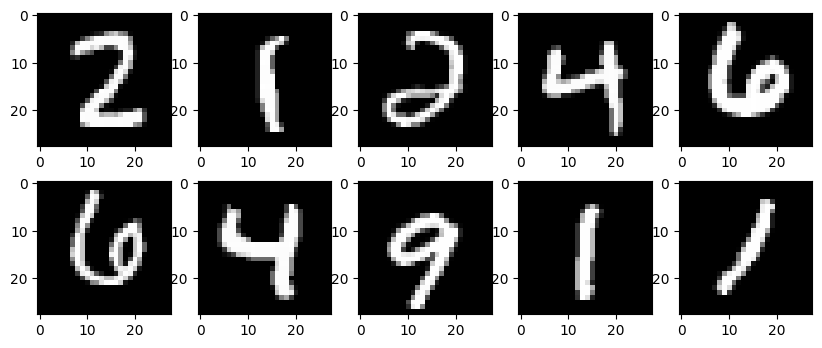

[2 1 2 4 6]
[6 4 9 1 1]


In [9]:
pred_y = model.predict(ts_X1[selected_ids, :])
vis_X = test_X[selected_ids, :].reshape((-1, 28, 28))
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for x, ax in zip(vis_X, axs.flatten()):
    ax.imshow(x, cmap="gray")
plt.show()
print (pred_y[:5])
print (pred_y[5:])

In [ ]:
import pickle

with open ("model_set_1.bin", "wb") as f:
    pickle.dump(models_1, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
cs = [1.0/500, 1.0/4000, 1.0/10000, 1.0/15000, 1.0/20000]
models_2 = []
for c in tqdm(cs):
    model = linear_model.LogisticRegression(
        penalty="elasticnet", 
        C=c, # put a value not less than 500 and not more than 20000
        l1_ratio=0.0,
        multi_class="ovr",
        solver="saga",
        random_state=42,
        max_iter=1500, # put a value less than 3000
        n_jobs=4,
        verbose=1
    )
    model.fit(tr_X1, tr_y1)

    y_pred = model.predict(ts_X1)
    y_pred_proba = model.predict_proba(ts_X1)
    classification_report = metrics.classification_report(y_true=test_y, y_pred=y_pred)
    models_2.append({
        "model": model, 
        "classification_report": classification_report,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    })
    print ("---")
    print (model)
    print (classification_report)
print ("done")

  0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 827 epochs took 404 seconds
convergence after 845 epochs took 413 seconds
max_iter reached after 723 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 658 epochs took 312 seconds
max_iter reached after 725 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 720 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 949 epochs took 450 seconds
convergence after 1403 epochs took 610 seconds
max_iter reached after 632 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 352 seconds
---
LogisticRegression(C=0.002, l1_ratio=0.0, max_iter=1500, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.87      0.89      1032
           3       0.89      0.90      0.89      1010
           4       0.89      0.91      0.90       982
           5       0.89      0.83      0.86       892
           6       0.93      0.94      0.93       958
           7       0.93      0.91      0.92      1028
           8       0.83      0.88      0.85       974
           9       0.88      0.86      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 24.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 733 epochs took 348 seconds
convergence after 741 epochs took 352 seconds
convergence after 574 epochs took 271 seconds
max_iter reached after 710 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 710 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 710 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 856 epochs took 406 seconds
convergence after 1121 epochs took 521 seconds
max_iter reached after 566 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 322 seconds
---
LogisticRegression(C=0.00025, l1_ratio=0.0, max_iter=1500, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.89      0.91      0.90       982
           5       0.89      0.83      0.86       892
           6       0.92      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.83      0.87      0.85       974
           9       0.88      0.86      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 23.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 614 epochs took 290 seconds
convergence after 631 epochs took 297 seconds
convergence after 482 epochs took 228 seconds
convergence after 1177 epochs took 557 seconds
convergence after 1324 epochs took 629 seconds
convergence after 1141 epochs took 542 seconds
convergence after 849 epochs took 401 seconds
convergence after 735 epochs took 334 seconds
convergence after 1237 epochs took 491 seconds
convergence after 926 epochs took 252 seconds
---
LogisticRegression(C=0.0001, l1_ratio=0.0, max_iter=1500, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.91      0.90       982
           5     

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 18.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 553 epochs took 262 seconds
convergence after 563 epochs took 265 seconds
convergence after 979 epochs took 462 seconds
convergence after 436 epochs took 207 seconds
convergence after 1027 epochs took 487 seconds
convergence after 971 epochs took 459 seconds
convergence after 658 epochs took 311 seconds
convergence after 715 epochs took 337 seconds
convergence after 1002 epochs took 400 seconds
convergence after 706 epochs took 183 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.0, max_iter=1500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.90      0.91      0.90       982
    

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 15.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 506 epochs took 238 seconds
convergence after 509 epochs took 241 seconds
convergence after 826 epochs took 392 seconds
convergence after 861 epochs took 408 seconds
convergence after 399 epochs took 188 seconds
convergence after 834 epochs took 395 seconds
convergence after 622 epochs took 293 seconds
convergence after 596 epochs took 276 seconds
convergence after 848 epochs took 346 seconds
convergence after 598 epochs took 152 seconds
---
LogisticRegression(C=5e-05, l1_ratio=0.0, max_iter=1500, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.89      0.91      0.90       982
           5       0.8

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 13.1min finished


In [ ]:
import pickle

with open ("model_set_2.bin", "wb") as f:
    pickle.dump(models_2, f, protocol=pickle.HIGHEST_PROTOCOL)

### Singular Value Decomposition

Given a matrix $A$, which is an $m \times n$ matrix, it can be approximated as:

$$A_{\text{approx.}} = U \Sigma V^T$$

where $U$ is an $n \times k$ matrix, $\Sigma$ is a $k \times k$ matrix and $V^T$ is a $k \times m$ matrix. 

Since $U$ and $V^T$ are **othonormal** (just trust me on this), $V^TV$ and $U^TU$ are identity matrices $I$. 

So, $$AV = U \Sigma V^T V = U \Sigma I = U \Sigma$$

Since $V$ is $m \times k$ matrix and is constant, we can use $AV$ as our features.

In [ ]:
tr_X2 = flatten(train_X)
ts_X2 = flatten(test_X)

tr_y2 = train_y

In [ ]:
from scipy import linalg
svd_results = {}
k = 10
n_classes = 10
pbar = tqdm(list(range(0, 10)))
for y_value in pbar:
    selector = tr_y2 == y_value
    X_ = tr_X2[selector]
    pbar.set_description("y_value : {} ; X_ shape : {}".format(y_value, X_.shape))
    U, s, Vt = linalg.svd(X_)
    S = linalg.diagsvd(s[:k], k, k)
    Vt_ = Vt[:k, :]
    V_ = Vt_.T
    svd_results[y_value] = {
        "U": U,
        "Vt": Vt,
        "s" : S,
        "Vt_": Vt_, 
        "V_": V_,
        "selector": selector
    }

  0%|          | 0/10 [00:00<?, ?it/s]

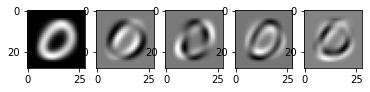

[[0 0 0 0 0]]


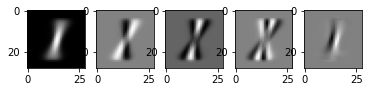

[[1 1 1 1 1]]


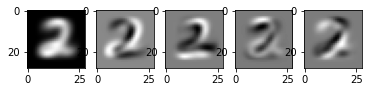

[[2 2 2 2 2]]


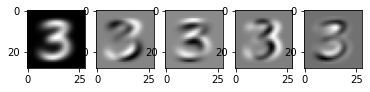

[[3 3 3 3 3]]


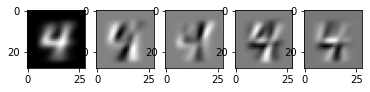

[[4 4 4 4 4]]


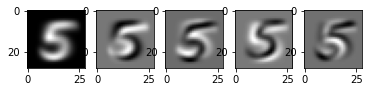

[[5 5 5 5 5]]


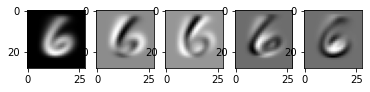

[[6 6 6 6 6]]


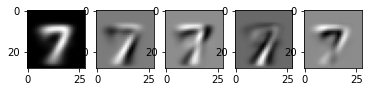

[[7 7 7 7 7]]


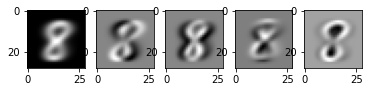

[[8 8 8 8 8]]


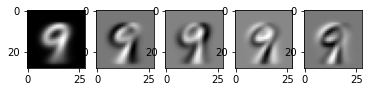

[[9 9 9 9 9]]


In [ ]:
for y_value in range(0, 10):
    utils.visualize(svd_results[y_value]["Vt_"][0:5].reshape(-1, 28, 28), y=[y_value]*5)

In [ ]:
features_X = []
pbar = tqdm(list(range(0, 10)))
for y_value in pbar:
    pbar.set_description("calculating features for : {}".format(y_value))
    svd_result = svd_results[y_value]
    V_ = svd_result["V_"]
    X_ = tr_X2 @ V_
    features_X.append(X_)
print("concating all features ... ")
tr_X3 = np.hstack(tuple(features_X))
tr_y3 = train_y.copy()
tr_X3.shape

  0%|          | 0/10 [00:00<?, ?it/s]

concating all features ... 


(60000, 100)

In [ ]:
tr_X3.shape
def get_features(X, svd_results):
    ts_X2 = flatten(X)
    features_Xts = []
    pbar = tqdm(list(range(0, 10)))
    for y_value in pbar:
        pbar.set_description("calculating features for : {}".format(y_value))
        svd_result = svd_results[y_value]
        V_ = svd_result["V_"]
        X_ts = ts_X2 @ V_
        features_Xts.append(X_ts)
    print("concating all features ... ")
    t_X3_ = np.hstack(tuple(features_Xts))
    return t_X3_ # write a program to work with any X

ts_y3 = test_y.copy()

ts_X3 = get_features(test_X, svd_results=svd_results)
ts_X3.shape

  0%|          | 0/10 [00:00<?, ?it/s]

concating all features ... 


(10000, 100)

In [ ]:
cs = [1.0/500, 1.0/4000, 1.0/10000, 1.0/15000, 1.0/20000] 
models_3 = []
for c in cs:
    model = linear_model.LogisticRegression(
        penalty="elasticnet", 
        C=c,
        l1_ratio=0.0,
        multi_class="ovr",
        solver="saga",
        random_state=42,
        max_iter=5000,
        n_jobs=4,
        verbose=1
    )
    model.fit(tr_X3, tr_y3)

    y_pred = model.predict(ts_X3)
    y_pred_proba = model.predict_proba(ts_X3)
    classification_report = metrics.classification_report(y_true=test_y, y_pred=y_pred)

    models_3.append({
        "model": model, 
        "classification_report": classification_report,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    })
    print ("---")
    print (model)
    print (classification_report)
print ("done")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 479 epochs took 160 seconds
convergence after 495 epochs took 165 seconds
convergence after 550 epochs took 185 seconds
convergence after 556 epochs took 187 seconds
convergence after 410 epochs took 136 seconds
convergence after 471 epochs took 156 seconds
convergence after 431 epochs took 143 seconds
convergence after 458 epochs took 149 seconds
convergence after 410 epochs took 90 seconds
convergence after 436 epochs took 77 seconds
---
LogisticRegression(C=0.002, l1_ratio=0.0, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.91 

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 478 epochs took 160 seconds
convergence after 494 epochs took 164 seconds
convergence after 523 epochs took 175 seconds
convergence after 562 epochs took 186 seconds
convergence after 411 epochs took 136 seconds
convergence after 430 epochs took 144 seconds
convergence after 471 epochs took 158 seconds
convergence after 457 epochs took 148 seconds
convergence after 408 epochs took 85 seconds
convergence after 436 epochs took 71 seconds
---
LogisticRegression(C=0.00025, l1_ratio=0.0, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.9

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 479 epochs took 161 seconds
convergence after 494 epochs took 164 seconds
convergence after 529 epochs took 176 seconds
convergence after 558 epochs took 185 seconds
convergence after 410 epochs took 138 seconds
convergence after 430 epochs took 144 seconds
convergence after 471 epochs took 158 seconds
convergence after 457 epochs took 150 seconds
convergence after 407 epochs took 82 seconds
convergence after 436 epochs took 70 seconds
---
LogisticRegression(C=0.0001, l1_ratio=0.0, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.91

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 479 epochs took 158 seconds
convergence after 494 epochs took 164 seconds
convergence after 531 epochs took 176 seconds
convergence after 561 epochs took 185 seconds
convergence after 410 epochs took 136 seconds
convergence after 471 epochs took 157 seconds
convergence after 430 epochs took 145 seconds
convergence after 456 epochs took 147 seconds
convergence after 408 epochs took 83 seconds
convergence after 435 epochs took 67 seconds
---
LogisticRegression(C=6.666666666666667e-05, l1_ratio=0.0, max_iter=5000,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
        

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 479 epochs took 155 seconds
convergence after 495 epochs took 160 seconds
convergence after 521 epochs took 170 seconds
convergence after 555 epochs took 180 seconds
convergence after 412 epochs took 136 seconds
convergence after 439 epochs took 144 seconds
convergence after 472 epochs took 155 seconds
convergence after 456 epochs took 147 seconds
convergence after 408 epochs took 81 seconds
convergence after 436 epochs took 67 seconds
---
LogisticRegression(C=5e-05, l1_ratio=0.0, max_iter=5000, multi_class='ovr',
                   n_jobs=4, penalty='elasticnet', random_state=42,
                   solver='saga', verbose=1)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.91 

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.4min finished


In [ ]:
import pickle

with open ("model_set_3.bin", "wb") as f:
    pickle.dump(models_3, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
tr_X, ts_X, tr_y, ts_y = model_selection.train_test_split(df_X, ds_y)

model = neighbors.KNeighborsRegressor()

model.fit(tr_X, tr_y)
y_pred = model.predict(ts_X)